# Analyzing a Movie Review Dataset - Part 2

## 1. Word2Vec

### Part a - Create our vector representation

In [1]:
import pandas as pd
import numpy as np

# Read data from files 
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)
unlabeled_train = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

# Verify the number of reviews that were read (100,000 in total)
print("Read %d labeled train reviews, %d labeled test reviews, and %d unlabeled reviews\n" 
      % (train["review"].size, test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [2]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist(review, remove_stopwords=False):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return words

In [3]:
import nltk.data
# nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences(review, tokenizer, remove_stopwords=False):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [4]:
sentences = []  # Initialize an empty list of sentences

print("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/ywu/miniconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))
/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks 

Parsing sentences from unlabeled set


/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like r

In [ ]:
# # Import the built-in logging module and configure it so that Word2Vec 
# # creates nice output messages
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
# Set values for various parameters
num_features = 100    # Word vector dimensionality
min_word_count = 40   # Minimum word count
num_workers = 4       # Number of threads to run in parallel
context = 5          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")
model_myself = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, 
                                 min_count = min_word_count, window = context, sample = downsampling)

Training model...


In [6]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model_myself.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "100features_40minwords_5context"
model_myself.save(model_name)

In [7]:
from gensim.models import Word2Vec, KeyedVectors

In [5]:
# model_myself = Word2Vec.load("100features_40minwords_5context")

In [8]:
z1 = model_myself.wv.syn0

In [9]:
word_list_z1 = model_myself.wv.index2word

### Part b - Load Google's vector representation

In [12]:
model_google = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [13]:
word_list_z2 = model_google.index2word

In [14]:
import time
start = time.time()

word_list_z2 = [z for z in word_list_z1 if z in word_list_z2]

end = time.time()
elapsed = end - start
print("Time taken for intersection: ", elapsed, "seconds.")

Time taken for intersection:  166.90646123886108 seconds.


In [15]:
# Filter the Google pretrained word2vec model
z2 = np.zeros([len(word_list_z2), 300], dtype="float32")

for i, word in enumerate(word_list_z2):
    z2[i, :] = model_google[word]

### Part c - K-means clustering

In [18]:
from sklearn.cluster import KMeans

# Set "k" (num_clusters) to be 10
num_clusters = 10

# Initalize a k-means object
kmeans_clustering = KMeans(n_clusters = num_clusters)

K-means for Z1

In [19]:
start = time.time() # Start time

# Set "k" (num_clusters) to be 10
num_clusters = 10

# Use k-means to extract centroids
idx_z1 = kmeans_clustering.fit_predict(z1)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  3.962545156478882 seconds.


In [20]:
# Create a Word / Index dictionary, mapping each vocabulary word to a cluster number 
word_centroid_map_z1 = dict(zip(word_list_z1, idx_z1))

In [21]:
# For the first 10 clusters
for cluster in range(0,10):
    
    # Print the cluster number  
    print("\nCluster %d" % cluster)

    # Find all of the words for that cluster number, and print them out
    words = []
    count = 0
    for key, value in word_centroid_map_z1.items():
        if value == cluster:
            words.append(key)
            count += 1
        if count > 20:
            break
    print(words)


Cluster 0
['s', 'does', 'makes', 'seems', 'gets', 'played', 'found', 'trying', 'goes', 'comes', 'shows', 'plays', 'takes', 'left', 'used', 'given', 'playing', 'doing', 'gives', 'lost', 'written']

Cluster 1
['his', 'who', 'her', 'man', 'young', 'girl', 'woman', 'wife', 'himself', 'father', 'mother', 'boy', 'friend', 'son', 'evil', 'killer', 'child', 'daughter', 'hero', 'husband', 'brother']

Cluster 2
['character', 'life', 'world', 'own', 'family', 'death', 'human', 'lives', 'self', 'violence', 'lack', 'power', 'relationship', 'reality', 'problems', 'events', 'ways', 'crime', 'theme', 'tale', 'form']

Cluster 3
['by', 'american', 'star', 'black', 'classic', 'early', 'directed', 'late', 'writer', 'including', 'novel', 'modern', 'british', 'king', 'french', 'general', 'e', 'among', 'th', 'de', 'famous']

Cluster 4
['with', 'house', 'dead', 'face', 'head', 'white', 'run', 'hand', 'etc', 'car', 'fight', 'blood', 'running', 'room', 'body', 'eye', 'red', 'space', 'killing', 'dog', 'monster'

K-means for Z2

In [22]:
start = time.time() # Start time

# Use k-means to extract centroids
idx_z2 = kmeans_clustering.fit_predict(z2)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  13.321490049362183 seconds.


In [23]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number 
word_centroid_map_z2 = dict(zip(word_list_z2, idx_z2))

In [24]:
# For the first 10 clusters
for cluster in range(0,10):
    
    # Print the cluster number  
    print("\nCluster %d" % cluster)

    # Find all of the words for that cluster number, and print them out
    words = []
    count = 0
    for key, value in word_centroid_map_z2.items():
        if value == cluster:
            words.append(key)
            count += 1
        if count > 20:
            break
    print(words)


Cluster 0
['her', 'she', 'people', 'him', 'man', 'scene', 'old', 'young', 'family', 'girl', 'woman', 'someone', 'war', 'wife', 'himself', 'death', 'house', 'father', 'men', 'dead', 'women']

Cluster 1
['the', 'it', 'in', 'this', 'that', 's', 'was', 'as', 'with', 'for', 'but', 'you', 'on', 'not', 'he', 'are', 'have', 'be', 'one', 'all', 'at']

Cluster 2
['his', 'just', 'when', 'my', 'get', 'after', 'watch', 'never', 'little', 'off', 'go', 'back', 'watching', 'thing', 'didn', 'going', 'again', 'cast', 'down', 'pretty', 'take']

Cluster 3
['screen', 'black', 'camera', 'piece', 'white', 'stuff', 'blood', 'eyes', 'room', 'body', 'jack', 'earth', 'eye', 'red', 'dog', 'rock', 'box', 'air', 'baby', 'water', 'cold']

Cluster 4
['good', 'bad', 'too', 'nothing', 'interesting', 'worst', 'seem', 'poor', 'boring', 'wrong', 'stupid', 'awful', 'terrible', 'often', 'sort', 'worse', 'unfortunately', 'totally', 'horrible', 'amazing', 'decent']

Cluster 5
['is', 'does', 'doesn', 'makes', 'seems', 'isn', 

### Part d - Featurize the training and test reviews

In [25]:
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))
    
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append(review_to_wordlist(review, remove_stopwords=True))

/Users/ywu/miniconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/ywu/miniconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


In [26]:
def create_bag_of_centroids(wordlist, word_centroid_map):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max(word_centroid_map.values()) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32")
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [27]:
# Pre-allocate an array for the training set bags of centroids (for speed)
x1_train = np.zeros((train["review"].size, num_clusters), dtype="float32")
x2_train = np.zeros((train["review"].size, num_clusters), dtype="float32")

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    x1_train[counter] = create_bag_of_centroids(review, word_centroid_map_z1)
    x2_train[counter] = create_bag_of_centroids(review, word_centroid_map_z2)
    counter += 1

# Repeat for test reviews 
x1_test = np.zeros((test["review"].size, num_clusters), dtype="float32")
x2_test = np.zeros((test["review"].size, num_clusters), dtype="float32")

counter = 0
for review in clean_test_reviews:
    x1_test[counter] = create_bag_of_centroids(review, word_centroid_map_z1)
    x2_test[counter] = create_bag_of_centroids(review, word_centroid_map_z2)
    counter += 1

In [28]:
np.save('x1_train.npy', x1_train)
np.save('x2_train.npy', x2_train)
np.save('x1_test.npy', x1_test)
np.save('x2_test.npy', x2_test)

## 2. Topic Modeling

In [29]:
from gensim import corpora, models

In [30]:
# Create the corpus
id2word = corpora.Dictionary(clean_train_reviews)
train_corpus = [id2word.doc2bow(text) for text in clean_train_reviews]
test_corpus = [id2word.doc2bow(text) for text in clean_test_reviews]

### Part a - Number of topics = 10

In [31]:
num_topics = 10
lda_10 = models.ldamodel.LdaModel(corpus=train_corpus, id2word=id2word, num_topics=num_topics)

In [32]:
x3_train = np.zeros([len(clean_train_reviews), num_topics], dtype="float32")
x3_test = np.zeros([len(clean_test_reviews), num_topics], dtype="float32")

In [33]:
lda_train_10 = lda_10[train_corpus]
for i, elm in enumerate(lda_train_10):
    for key, value in elm:
        x3_train[i, key] = value

In [34]:
lda_test_10 = lda_10[test_corpus]
for i, elm in enumerate(lda_test_10):
    for key, value in elm:
        x3_test[i, key] = value

### Part b - Number of topics = 20

In [35]:
num_topics = 20
lda_20 = models.ldamodel.LdaModel(corpus=train_corpus, id2word=id2word, num_topics=num_topics)

In [36]:
x4_train = np.zeros([len(clean_train_reviews), num_topics], dtype="float32")
x4_test = np.zeros([len(clean_test_reviews), num_topics], dtype="float32")

In [37]:
lda_train_20 = lda_20[train_corpus]
for i, elm in enumerate(lda_train_20):
    for key, value in elm:
        x4_train[i, key] = value

In [38]:
lda_test_20 = lda_20[test_corpus]
for i, elm in enumerate(lda_test_20):
    for key, value in elm:
        x4_test[i, key] = value

In [39]:
np.save('x3_train.npy', x3_train)
np.save('x4_train.npy', x4_train)
np.save('x3_test.npy', x3_test)
np.save('x4_test.npy', x4_test)

### Part c - Print top 10 words with highest probabilities for each topic

In [40]:
lda_10.print_topics(num_topics=10, num_words=10)

[(0,
  '0.007*"jane" + 0.006*"film" + 0.006*"version" + 0.005*"like" + 0.004*"music" + 0.004*"tarzan" + 0.004*"book" + 0.003*"novel" + 0.003*"well" + 0.003*"much"'),
 (1,
  '0.007*"one" + 0.006*"film" + 0.004*"like" + 0.004*"man" + 0.003*"time" + 0.003*"also" + 0.003*"two" + 0.003*"story" + 0.003*"back" + 0.003*"christmas"'),
 (2,
  '0.008*"show" + 0.006*"like" + 0.006*"film" + 0.005*"one" + 0.004*"get" + 0.003*"episode" + 0.003*"plot" + 0.003*"good" + 0.003*"even" + 0.003*"movie"'),
 (3,
  '0.026*"film" + 0.011*"one" + 0.007*"story" + 0.005*"well" + 0.005*"time" + 0.005*"great" + 0.004*"see" + 0.004*"films" + 0.004*"life" + 0.004*"also"'),
 (4,
  '0.009*"one" + 0.008*"movie" + 0.005*"like" + 0.005*"film" + 0.004*"even" + 0.003*"comedy" + 0.003*"get" + 0.003*"good" + 0.003*"much" + 0.003*"would"'),
 (5,
  '0.015*"film" + 0.005*"one" + 0.004*"even" + 0.004*"like" + 0.004*"story" + 0.004*"time" + 0.003*"war" + 0.003*"would" + 0.003*"two" + 0.003*"well"'),
 (6,
  '0.005*"one" + 0.005*"als

In [41]:
lda_20.print_topics(num_topics=20, num_words=10)

[(0,
  '0.007*"one" + 0.005*"film" + 0.005*"tarzan" + 0.005*"king" + 0.004*"war" + 0.004*"man" + 0.004*"steve" + 0.004*"new" + 0.003*"well" + 0.003*"two"'),
 (1,
  '0.008*"one" + 0.005*"film" + 0.005*"jack" + 0.004*"man" + 0.004*"hotel" + 0.003*"even" + 0.003*"mary" + 0.003*"killer" + 0.003*"like" + 0.003*"cage"'),
 (2,
  '0.073*"movie" + 0.014*"one" + 0.013*"good" + 0.012*"like" + 0.012*"movies" + 0.011*"really" + 0.009*"see" + 0.008*"watch" + 0.008*"would" + 0.008*"bad"'),
 (3,
  '0.026*"film" + 0.011*"one" + 0.009*"movie" + 0.008*"story" + 0.005*"well" + 0.005*"life" + 0.005*"like" + 0.005*"great" + 0.005*"also" + 0.005*"see"'),
 (4,
  '0.030*"film" + 0.012*"bad" + 0.011*"one" + 0.011*"like" + 0.008*"movie" + 0.008*"even" + 0.007*"acting" + 0.006*"good" + 0.006*"would" + 0.005*"worst"'),
 (5,
  '0.021*"movie" + 0.018*"film" + 0.009*"one" + 0.009*"like" + 0.008*"good" + 0.007*"story" + 0.006*"much" + 0.006*"really" + 0.006*"even" + 0.005*"make"'),
 (6,
  '0.011*"like" + 0.008*"one" +

## 3. Classification Experiment

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [43]:
y_train = train['sentiment'].as_matrix()

### Part a - Train random forest

In [44]:
def split(data, label):
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [45]:
# Split dataset into training and test set
x1_train_split, x1_test_split, y1_train_split, y1_test_split = split(x1_train, y_train)
x2_train_split, x2_test_split, y2_train_split, y2_test_split = split(x2_train, y_train)
x3_train_split, x3_test_split, y3_train_split, y3_test_split = split(x3_train, y_train)
x4_train_split, x4_test_split, y4_train_split, y4_test_split = split(x4_train, y_train)

In [46]:
n_tree = [50, 100, 150, 200, 300, 400, 500, 750, 1000]

### Fit random forest for X1

In [47]:
start = time.time()

result1 = []
for n in n_tree:
    clf1 = RandomForestClassifier(n_estimators = n)
    scores1 = cross_val_score(clf1, x1_train_split, y1_train_split, cv=5)
    result1.append(scores1.mean())

end = time.time()
elapsed = end - start
print("Time taken for cross validation: ", elapsed, "seconds.")

Time taken for cross validation:  340.6162130832672 seconds.


In [48]:
result1

[0.61114943038746439,
 0.61600013064375803,
 0.61559985568124098,
 0.61839968083748009,
 0.62015034337189645,
 0.62045005593750346,
 0.61845011832813235,
 0.62005010591250653,
 0.61804988078124257]

In [49]:
clf1 = RandomForestClassifier(n_estimators=400)
clf1 = clf1.fit(x1_train_split, y1_train_split)
y1_score = clf1.predict_proba(x1_test_split)
auc1 = roc_auc_score(y1_test_split, y1_score[:, 1])

In [50]:
auc1

0.67695203159692785

### Fit random forest for X2

In [51]:
start = time.time()

result2 = []
for n in n_tree:
    clf2 = RandomForestClassifier(n_estimators = n)
    scores2 = cross_val_score(clf2, x2_train_split, y2_train_split, cv=5)
    result2.append(scores2.mean())

end = time.time()
elapsed = end - start
print("Time taken for cross validation: ", elapsed, "seconds.")

Time taken for cross validation:  347.59569215774536 seconds.


In [52]:
result2

[0.70710073525004602,
 0.71030039785314991,
 0.71285054802190939,
 0.71140023540001462,
 0.71260054799690908,
 0.71314989801561857,
 0.71410044810315287,
 0.71435019810313738,
 0.71430046060627872]

In [53]:
clf2 = RandomForestClassifier(n_estimators=750)
clf2 = clf2.fit(x2_train_split, y2_train_split)
y2_score = clf2.predict_proba(x2_test_split)
auc2 = roc_auc_score(y2_test_split, y2_score[:, 1])

In [54]:
auc2

0.78548180001075596

### Fit random forest for X3

In [55]:
start = time.time()

result3 = []
for n in n_tree:
    clf3 = RandomForestClassifier(n_estimators = n)
    scores3 = cross_val_score(clf3, x3_train_split, y3_train_split, cv=5)
    result3.append(scores3.mean())

end = time.time()
elapsed = end - start
print("Time taken for cross validation: ", elapsed, "seconds.")

Time taken for cross validation:  508.38200306892395 seconds.


In [56]:
result3

[0.69475028477501777,
 0.69775143490008973,
 0.69905083500005216,
 0.69880074745317178,
 0.69990093501880835,
 0.69820089744068103,
 0.69850087247192949,
 0.69745124735945296,
 0.69955099752818739]

In [57]:
clf3 = RandomForestClassifier(n_estimators=500)
clf3 = clf3.fit(x3_train_split, y3_train_split)
y3_score = clf3.predict_proba(x3_test_split)
auc3 = roc_auc_score(y3_test_split, y3_score[:, 1])

In [58]:
auc3

0.76935993684711934

### Fit random forest for X4

In [59]:
start = time.time()

result4 = []
for n in n_tree:
    clf4 = RandomForestClassifier(n_estimators = n)
    scores4 = cross_val_score(clf4, x4_train_split, y4_train_split, cv=5)
    result4.append(scores4.mean())

end = time.time()
elapsed = end - start
print("Time taken for cross validation: ", elapsed, "seconds.")

Time taken for cross validation:  545.7423219680786 seconds.


In [60]:
result4

[0.76170082550942664,
 0.76230038802502431,
 0.76225075051567193,
 0.76370068809379288,
 0.76545067567191727,
 0.7637506256094142,
 0.76350038806877429,
 0.76400077564692359,
 0.76500053813753366]

In [61]:
clf4 = RandomForestClassifier(n_estimators=1000)
clf4 = clf4.fit(x4_train_split, y4_train_split)
y4_score = clf4.predict_proba(x4_test_split)
auc4 = roc_auc_score(y4_test_split, y4_score[:, 1])

In [62]:
auc4

0.84121346493171234

### Plot the ROC curves

In [63]:
import matplotlib.pyplot as plt
# import seaborn as sns

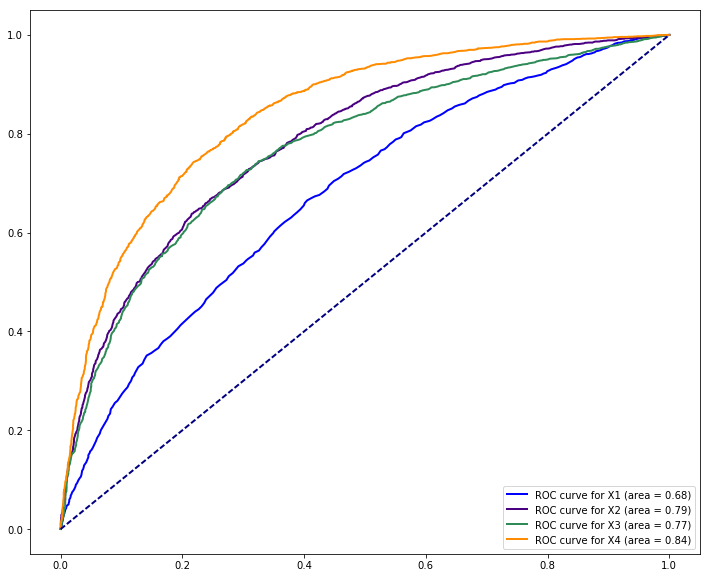

In [64]:
colors = ['blue', 'indigo', 'seagreen', 'darkorange']

plt.figure(figsize=(12,10))
fpr1, tpr1, _ = roc_curve(y1_test_split, y1_score[:, 1])
fpr2, tpr2, _ = roc_curve(y2_test_split, y2_score[:, 1])
fpr3, tpr3, _ = roc_curve(y3_test_split, y3_score[:, 1])
fpr4, tpr4, _ = roc_curve(y4_test_split, y4_score[:, 1])
plt.plot(fpr1, tpr1, lw=2, color=colors[0], label='ROC curve for X%d (area = %0.2f)' % (1, auc1))
plt.plot(fpr2, tpr2, lw=2, color=colors[1], label='ROC curve for X%d (area = %0.2f)' % (2, auc2))
plt.plot(fpr3, tpr3, lw=2, color=colors[2], label='ROC curve for X%d (area = %0.2f)' % (3, auc3))
plt.plot(fpr4, tpr4, lw=2, color=colors[3], label='ROC curve for X%d (area = %0.2f)' % (4, auc4))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()

## Kaggle scores

In [65]:
clf1 = RandomForestClassifier(n_estimators=400)
clf2 = RandomForestClassifier(n_estimators=750)
clf3 = RandomForestClassifier(n_estimators=500)
clf4 = RandomForestClassifier(n_estimators=1000)

In [66]:
y1_test = clf1.fit(x1_train, y_train).predict(x1_test)
y2_test = clf2.fit(x2_train, y_train).predict(x2_test)
y3_test = clf3.fit(x3_train, y_train).predict(x3_test)
y4_test = clf4.fit(x4_train, y_train).predict(x4_test)

In [67]:
output1 = pd.DataFrame(data={"id":test["id"], "sentiment":y1_test})
output1.to_csv("result1.csv", index=False, quoting=3)

output2 = pd.DataFrame(data={"id":test["id"], "sentiment":y2_test})
output2.to_csv("result2.csv", index=False, quoting=3)

output3 = pd.DataFrame(data={"id":test["id"], "sentiment":y3_test})
output3.to_csv("result3.csv", index=False, quoting=3)

output4 = pd.DataFrame(data={"id":test["id"], "sentiment":y4_test})
output4.to_csv("result4.csv", index=False, quoting=3)

For X1, Kaggle score: 0.62716

For X2, Kaggle score: 0.71912

For X3, Kaggle score: 0.68852

For X4, Kaggle score: 0.76176

![Kaggle Score](KaggleScore.png)

Topic modeling is better than word2vec, especially for n_topics = 20. However, they all worse than the simple bag-of-words approach.

Three way to improve efficiency of the classifier:
- Grid search the best combination of parameters in random forest
- Set more topics in LDA
- Use tf-idf as term-weighting schemes